In [ ]:
import stVGP
import scanpy as sc
import pandas as pd
import numpy as np
import anndata as ad
import os
from matplotlib.image import imread

import warnings
warnings.filterwarnings("ignore")

d:\anaconda\envs\xw_cuda117\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
layer_1 = pd.read_csv('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Raw_data/Layer1_BC_count_matrix-1.tsv',sep='\t')
layer_2 = pd.read_csv('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Raw_data/Layer2_BC_count_matrix-1.tsv',sep='\t')
layer_3 = pd.read_csv('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Raw_data/Layer3_BC_count_matrix-1.tsv',sep='\t')
layer_4 = pd.read_csv('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Raw_data/Layer4_BC_count_matrix-1.tsv',sep='\t')

layer_1_spot_names = layer_1['Unnamed: 0'].str.split('x')
layer_1_x_spatial,layer_1_y_spatial = layer_1_spot_names.str[0],layer_1_spot_names.str[1]
layer_1_spatial = np.hstack((np.array(layer_1_x_spatial).reshape(-1,1),np.array(layer_1_y_spatial).reshape(-1,1)))
layer_1_var_names = np.array(layer_1.columns[1:])
layer_1_obs_names = np.array(layer_1['Unnamed: 0'])
count_matrix_layer_1 = layer_1.values[:,1:]
print(count_matrix_layer_1.shape)
layer_2_spot_names = layer_2['Unnamed: 0'].str.split('x')
layer_2_x_spatial,layer_2_y_spatial = layer_2_spot_names.str[0],layer_2_spot_names.str[1]
layer_2_spatial = np.hstack((np.array(layer_2_x_spatial).reshape(-1,1),np.array(layer_2_y_spatial).reshape(-1,1)))
layer_2_var_names = np.array(layer_2.columns[1:])
layer_2_obs_names = np.array(layer_2['Unnamed: 0'])
count_matrix_layer_2 = layer_2.values[:,1:]
print(count_matrix_layer_2.shape)
layer_3_spot_names = layer_3['Unnamed: 0'].str.split('x')
layer_3_x_spatial,layer_3_y_spatial = layer_3_spot_names.str[0],layer_3_spot_names.str[1]
layer_3_spatial = np.hstack((np.array(layer_3_x_spatial).reshape(-1,1),np.array(layer_3_y_spatial).reshape(-1,1)))
layer_3_var_names = np.array(layer_3.columns[1:])
layer_3_obs_names = np.array(layer_3['Unnamed: 0'])
count_matrix_layer_3 = layer_3.values[:,1:]
print(count_matrix_layer_3.shape)
layer_4_spot_names = layer_4['Unnamed: 0'].str.split('x')
layer_4_x_spatial,layer_4_y_spatial = layer_4_spot_names.str[0],layer_4_spot_names.str[1]
layer_4_spatial = np.hstack((np.array(layer_4_x_spatial).reshape(-1,1),np.array(layer_4_y_spatial).reshape(-1,1)))
layer_4_var_names = np.array(layer_4.columns[1:])
layer_4_obs_names = np.array(layer_4['Unnamed: 0'])
count_matrix_layer_4 = layer_4.values[:,1:]
print(count_matrix_layer_4.shape)
slice_use = ['Layer1','Layer2','Layer3','Layer4']

adata_layer_1 = ad.AnnData(X=count_matrix_layer_1)
adata_layer_1.obs.index = layer_1_obs_names
adata_layer_1.var.index = layer_1_var_names
adata_layer_1.obs['samples_idx'] = np.array(['Layer1'] * count_matrix_layer_1.shape[0]).ravel()
adata_layer_1.obsm['spatial'] = np.array(layer_1_spatial,dtype = np.float32)
adata_layer_1.obsm['loc_use'] = np.array(layer_1_spatial,dtype = np.float32)
adata_layer_1.obsm['raw_count'] = np.array(count_matrix_layer_1,dtype = np.float32)

adata_layer_2 = ad.AnnData(X=count_matrix_layer_2)
adata_layer_2.obs.index = layer_2_obs_names
adata_layer_2.var.index = layer_2_var_names
adata_layer_2.obs['samples_idx'] = np.array(['Layer2'] * count_matrix_layer_2.shape[0]).ravel()
adata_layer_2.obsm['spatial'] = np.array(layer_2_spatial,dtype = np.float32)
adata_layer_2.obsm['loc_use'] = np.array(layer_2_spatial,dtype = np.float32)
adata_layer_2.obsm['raw_count'] = np.array(count_matrix_layer_2,dtype = np.float32)

adata_layer_3 = ad.AnnData(X=count_matrix_layer_3)
adata_layer_3.obs.index = layer_3_obs_names
adata_layer_3.var.index = layer_3_var_names
adata_layer_3.obs['samples_idx'] = np.array(['Layer3'] * count_matrix_layer_3.shape[0]).ravel()
adata_layer_3.obsm['spatial'] = np.array(layer_3_spatial,dtype = np.float32)
adata_layer_3.obsm['loc_use'] = np.array(layer_3_spatial,dtype = np.float32)
adata_layer_3.obsm['raw_count'] = np.array(count_matrix_layer_3,dtype = np.float32)

adata_layer_4 = ad.AnnData(X=count_matrix_layer_4)
adata_layer_4.obs.index = layer_4_obs_names
adata_layer_4.var.index = layer_4_var_names
adata_layer_4.obs['samples_idx'] = np.array(['Layer4'] * count_matrix_layer_4.shape[0]).ravel()
adata_layer_4.obsm['spatial'] = np.array(layer_4_spatial,dtype = np.float32)
adata_layer_4.obsm['loc_use'] = np.array(layer_4_spatial,dtype = np.float32)
adata_layer_4.obsm['raw_count'] = np.array(count_matrix_layer_4,dtype = np.float32)

adata_concat = ad.concat([adata_layer_1,adata_layer_2,adata_layer_3,adata_layer_4])

sc.pp.filter_cells(adata_concat, min_genes = 1)
sc.pp.filter_genes(adata_concat, min_cells = 1)
sc.pp.normalize_total(adata_concat, inplace=True)
sc.pp.log1p(adata_concat)

slice_list = []
for slice_name in slice_use:
    slice_list.append(adata_concat[adata_concat.obs['samples_idx']==slice_name])

adata_common_list = []
for adata_index in range(len(slice_list)):
    adata_st_new = slice_list[adata_index].copy()
    sc.pp.highly_variable_genes(adata_st_new, flavor = 'seurat', n_top_genes = 6000)
    adata_subset = adata_st_new[:, adata_st_new.var['highly_variable']]
    adata_common_list.append(adata_subset)
common_genes = np.array(adata_common_list[0].var_names)
for adata in adata_common_list[1:]:
    common_genes = np.intersect1d(common_genes,np.array(adata.var_names))
adata_list = [adata[:, list(common_genes)] for adata in adata_common_list]

sc.pp.filter_cells(adata_list[0], min_genes = 1)
sc.pp.filter_cells(adata_list[1], min_genes = 1)
sc.pp.filter_cells(adata_list[2], min_genes = 1)
sc.pp.filter_cells(adata_list[3], min_genes = 1)

(254, 14880)
(251, 14789)
(264, 14929)
(262, 14808)


In [3]:
# slice_use = ['BC_Layer1','BC_Layer2','BC_Layer3','BC_Layer4']
# for adata_index in range(len(adata_list)):
#     adata_list[adata_index].write("C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Raw_data/{}_slice.h5ad".format(slice_use[adata_index]))

In [ ]:
import os 
for ref_index in range(len(adata_list)):
    if not os.path.exists("C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/select_gene/{}".format(ref_index)):
        os.makedirs("C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/select_gene/{}".format(ref_index))
    adata_list = stVGP.select_gene(adata_list,
                                    ref_adata_num=ref_index,
                                    spot_make=2,
                                    save_data=False,
                                    key_words = 'loc_use',
                                    savepath='C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/select_gene/{}/'.format(ref_index))

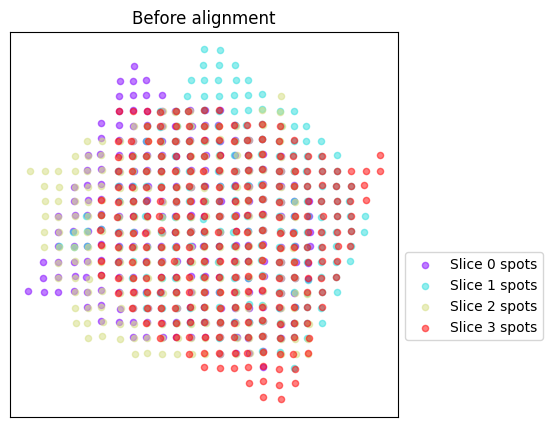

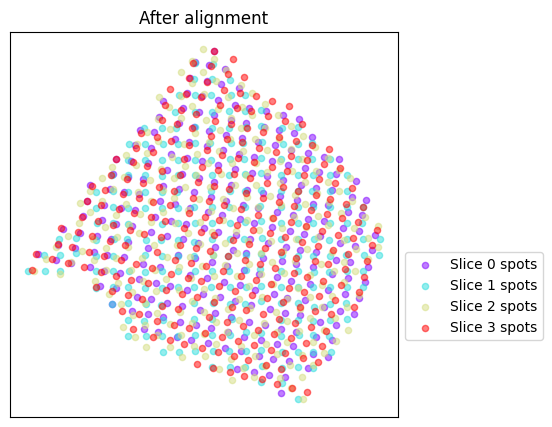

In [ ]:
file_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/select_gene'
gene_input_list = []
for i in range(len(adata_list)):
    gene_morans_result = np.genfromtxt(file_path + '/{}/gene_morans_4.txt'.format(i),
                                   dtype=np.str0,
                                   skip_header=1,
                                   delimiter ='\t')
    sorted_indices = np.argsort(gene_morans_result[:,-1])[::-1]
    top_morans_indices = sorted_indices[:4]
    select_gene_final = gene_morans_result[top_morans_indices,0]
    gene_input_list.append(select_gene_final)

adata_list = stVGP.gene_rigid_alignment(
        gene_input = gene_input_list[0],
        stadata_input = adata_list,
        ini_spatial = 'loc_use',
        add_spatial = 'align_spatial',
        align_model = "single_template_alignment",
        gene_input_list = gene_input_list,
        ref_label = 1,
        align_method = 'optimize',
        icp_iterations = 20,                          
        maxiter = 300
)

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib

cmap = cm.get_cmap('rainbow', len(adata_list))
colors_list = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(len(adata_list))]

# Plot spots before alignment
plt.figure(figsize=(5, 5))
plt.title("Before alignment")
for i in range(len(adata_list)):
    plt.scatter(adata_list[i].obsm['loc_use'][:, 0], 
        adata_list[i].obsm['loc_use'][:, 1], 
        c=colors_list[i],
        label="Slice %d spots" % i, s=20., alpha=0.5)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xticks([])
plt.yticks([])
plt.legend(loc=(1.02, .2), ncol=(len(adata_list)//13 + 1))
plt.show()

cmap = cm.get_cmap('rainbow', len(adata_list))
colors_list = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(len(adata_list))]

# Plot spots before alignment
plt.figure(figsize=(5, 5))
plt.title("After alignment")
for i in range(len(adata_list)):
    plt.scatter(adata_list[i].obsm['align_spatial'][:, 0], 
        adata_list[i].obsm['align_spatial'][:, 1], 
        c=colors_list[i],
        label="Slice %d spots" % i, s=20., alpha=0.5)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.xticks([])
plt.yticks([])
plt.legend(loc=(1.02, .2), ncol=(len(adata_list)//13 + 1))
plt.show()

In [6]:
# slice_use = ['BC_Layer1','BC_Layer2','BC_Layer3','BC_Layer4']
# for adata_index in range(len(adata_list)):
#     adata_list[adata_index].write("C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/{}_slice.h5ad".format(slice_use[adata_index]))

In [7]:
work_path = "C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/"
slice_use = ['BC_Layer1','BC_Layer2','BC_Layer3','BC_Layer4']
adata_BC = []

for slice in slice_use:
    file_path = work_path + str(slice) + '_slice.h5ad'
    adata = sc.read(file_path)
    adata_BC.append(adata)

In [ ]:
import torch
slice_matrix,adj_matrix = stVGP.adata_preprocess_adjnet(
                                                input_adata = adata_BC,
                                                align_model = 'single_template_alignment',
                                                spatial_label = 'align_spatial',
                                                n_neighbors = 4,
                                                ref_label = 1,
                                                no_cross = False)

for adata_index in range(len(adata_BC)):
    adata_BC[adata_index].obsm['batch_effect_mapping'] = np.array(adata_BC[adata_index].obsm['batch_effect_mapping']).reshape(-1,1)

recon_x,embedding,model_params,logvar = stVGP.train_stVGP(
                        ST_need_reconstruction_matrix = slice_matrix,
                        all_spatial_net = adj_matrix,
                        lr = 0.0001,
                        weight_decay = 0.0001,
                        training_epoch = 3000,
                        num_heads = 1,
                        device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') ,
                        save_model = False,
                        save_model_path = 'path',
                        hidden_embedding = [512,30],
                        random_seed = 512,
                        optimize_method = 'adam',
                        whether_gradient_clipping = False,
                        gradient_clipping = 5.0)


Model training


100%|██████████| 3000/3000 [00:54<00:00, 54.73it/s]


In [ ]:
# Save embedded layer data
# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/embedding.txt',embedding,fmt='%s')
# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/logvar.txt',logvar,fmt='%s')

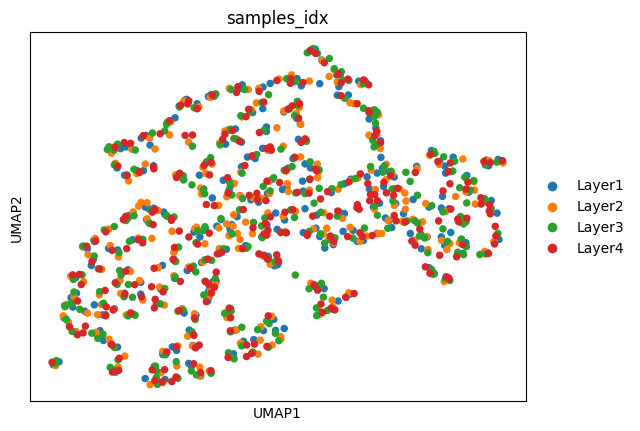

In [11]:
# Input adata
data_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/'

slice_use = ['BC_Layer1','BC_Layer2','BC_Layer3','BC_Layer4']
analysis_adata = []
for slice_idx in slice_use:
    adata_path = data_path + str(slice_idx) + '_slice.h5ad'
    adata = sc.read(adata_path)
    analysis_adata.append(adata)

slice_use = ['Layer1','Layer2','Layer3','Layer4']

adata_concat = ad.concat(analysis_adata)
embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/embedding.txt')
adata_dim = []
for adata in analysis_adata:
    adata_dim.append(adata.X.shape[0])
adata_dim = np.cumsum(adata_dim)
adata_dim = np.insert(adata_dim,0,0) 
adata_concat.obsm['latent'] = embedding

sc.pp.neighbors(adata_concat,use_rep='latent',n_neighbors=18)
sc.tl.umap(adata_concat)
sc.tl.louvain(adata_concat,resolution=0.2)
sc.pl.umap(adata_concat,color='samples_idx')

In [12]:
new_slice = []
for slice_name in slice_use:
    new_slice.append(adata_concat[adata_concat.obs['samples_idx']==slice_name])

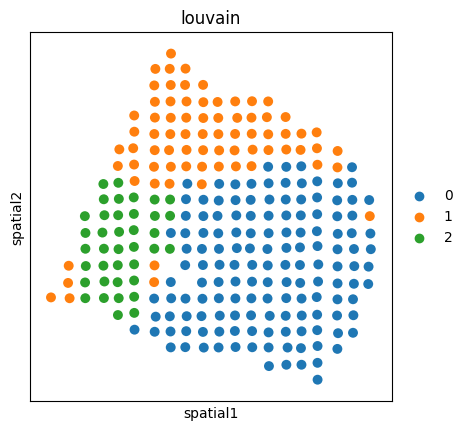

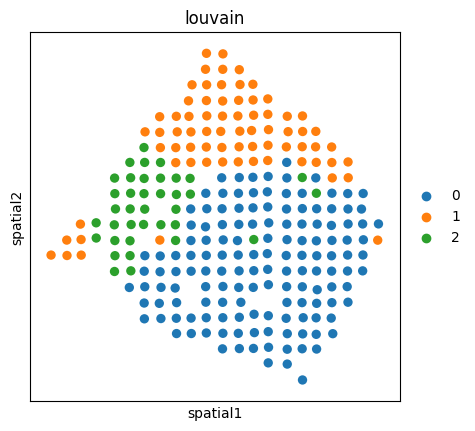

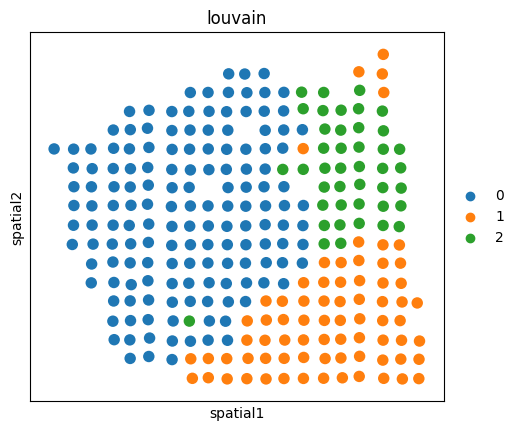

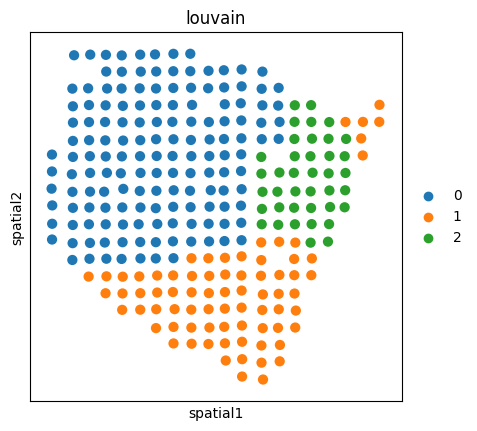

In [13]:
for i in range(len(new_slice)):
    sc.pl.spatial(new_slice[i],color='louvain',spot_size=0.6,show=True)

In [16]:
AP_z = [0.,10.,20.,30.]

for adata_index in range(len(new_slice)):
    if adata_index == 0:
        spatial_spots = np.array(new_slice[adata_index].obsm['align_spatial'])
        spatial_z = np.array([AP_z[adata_index]]*new_slice[adata_index].shape[0]).reshape(-1,1)
    else:
        spatial_spots = np.vstack((spatial_spots,new_slice[adata_index].obsm['align_spatial']))
        spatial_z = np.vstack((spatial_z,np.array([AP_z[adata_index]]*new_slice[adata_index].shape[0]).reshape(-1,1)))

spatial_spots = np.hstack((spatial_spots,spatial_z))
cluster = np.array(adata_concat.obs['louvain'])

# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/alignment_spatial.txt',spatial_spots,fmt='%s')
# np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/cluster.txt',cluster,fmt='%s')
# torch.save(model_params,"C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/model.pth")

['1' '1' '1' ... '1' '1' '1']


In [ ]:
# Gene prediction
# Masked slices prediction

spatial = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/alignment_spatial.txt')
embedding = np.loadtxt("C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/embedding.txt")

slice_use = ['MOB_replicate_10','MOB_replicate_11','MOB_replicate_12']

for slice_index,slice_name in enumerate(slice_use):

    Train_spatial_up = spatial[:adata_dim[slice_index]]
    Train_spatial_down = spatial[adata_dim[slice_index+1]:]

    Embedding_up = embedding[:adata_dim[slice_index]]
    Embedding_down = embedding[adata_dim[slice_index+1]:]

    Pred_spatial = spatial[adata_dim[slice_index]:adata_dim[slice_index+1]]
    Pred_embedding_true = embedding[adata_dim[slice_index]:adata_dim[slice_index+1]]

    Train_spatial = np.vstack((Train_spatial_up,Train_spatial_down))
    Train_embedding = np.vstack((Embedding_up,Embedding_down))

    pred_embedding = stVGP.get_3D_prediction(
                train_coordinates = Train_spatial,
                embedding = Train_embedding,
                spatial_pred = Pred_spatial,
                noise = False,
                noise_value = 0.00001,
                constant_value = 1.0,
                Rbf_value = 1024)
    
    print(pred_embedding.shape)

    # np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/mob/Prediction and 3D/{}_embedding.txt'.format(slice_use[slice_index]),pred_embedding,fmt='%s')

(254, 30)
(250, 30)
(264, 30)


In [ ]:
data_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/'
slice_use = ['BC_Layer1','BC_Layer2','BC_Layer3','BC_Layer4']
adata_list = []
for slice_name in slice_use:
    file_name = data_path + slice_name + '_slice.h5ad'
    adata = sc.read(file_name)
    adata_list.append(adata)

slice_matrix,adj_matrix = stVGP.adata_preprocess_adjnet(
                                                input_adata = adata_list,
                                                align_model = 'single_template_alignment',
                                                spatial_label = 'align_spatial',
                                                n_neighbors = 4,
                                                ref_label = 1,
                                                no_cross = False)

for adata_index in range(len(adata_list)):
    adata_list[adata_index].obsm['batch_effect_mapping'] = np.array(adata_list[adata_index].obsm['batch_effect_mapping']).reshape(-1,1)

slice_matrix = torch.tensor(slice_matrix,dtype=torch.float32)
edge_list = []
edge_list.append(adj_matrix.row.tolist())
edge_list.append(adj_matrix.col.tolist())
adj_tensor = torch.LongTensor(edge_list)

slice_use = ['Layer1','Layer2','Layer3','Layer4']
for slice_index,slice_name in enumerate(slice_use):
    if slice_index == 0:
        prediction_embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Prediction and 3D/{}_embedding.txt'.format(slice_name))
    else:
        input_embedding = np.loadtxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Prediction and 3D/{}_embedding.txt'.format(slice_name))
        prediction_embedding = np.vstack((prediction_embedding,input_embedding))
prediction_embedding = torch.tensor(prediction_embedding,dtype=torch.float32)

In [21]:
model_path = 'C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Domain/' 
checkpoint = torch.load(model_path + 'model.pth')

In [ ]:
Gene_reconstruction = stVGP.gene_prediction(
    slice_matrix = slice_matrix,
    prediction_embedding = prediction_embedding,               
    adj_matrix = adj_tensor,                        
    checkpoint = checkpoint,                         
    model_layer = [slice_matrix.shape[1],512,30,1],                       
    all_gat = False,                            
    logvar = None,                            
    device = torch.device('cuda:0')
)

In [23]:
np.savetxt('C:/Users/wzd/Desktop/Alignment Domain Prediction/bc/Prediction and 3D/Gene_reconstruction.txt',Gene_reconstruction,fmt='%s')